In [1]:
import numpy as np
import fitsio
import pandas as pd
import utils
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib

In [2]:
TAO_PATH = '.'
MANTRA_PATH = '../MANTRA'

font = {'size' : 20}
matplotlib.rc('font', **font)

## Reading TAO dataset

./data/AGN/CSS130627:001809+274920.fits


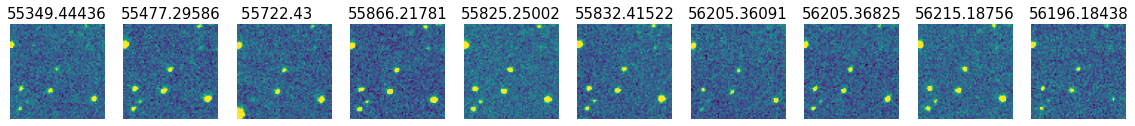

In [3]:
# An example with an AGN object
TAO_example_path = TAO_PATH+'/data/AGN/CSS130627:001809+274920.fits'
print(TAO_example_path)

fig = plt.figure(figsize=(20,5))
data, h = fitsio.read(TAO_example_path, header=True)
N_Images = h['N_Images']
exts = np.arange(2,N_Images+2)
MJDs = np.array(data['MJD'])
np.random.shuffle(exts)

for i, ext in enumerate(np.sort(exts[:10])):
    plt.subplot(1,10,i+1)
    data = fitsio.read(TAO_example_path, ext=ext)
    zmin, zmax = utils.zscale(data)
    plt.imshow(data, vmin=zmin, vmax=zmax)
    plt.title('{}'.format(MJDs[ext-2]), fontsize=15)
    plt.axis('off')

## Reading MANTRA dataset

In [4]:
mantra_info = pd.read_csv(MANTRA_PATH+'/data/lightcurves/transient_info.txt', sep='\t')
mantra_lightcurves = pd.read_csv(MANTRA_PATH+'/data/lightcurves/transient_lightcurves.csv')

print(mantra_info.keys())
print(mantra_lightcurves.keys(), end='\n\n')

CRTS_ID = mantra_info['#CRTS ID']
CSS_ID = mantra_info['CSS images']
Classification = mantra_info['Classification']

TAO_example_path.split('/')[-1]
CSS_example = np.array(CSS_ID)[CRTS_ID == TAO_example_path.split('/')[-1].split('.')[0]][0]
CLASS_example = np.array(Classification)[CRTS_ID == TAO_example_path.split('/')[-1].split('.')[0]][0]

print(CSS_example, CLASS_example)

Index(['#CRTS ID', 'RA (J2000)', 'Dec (J2000)', 'UT Date', 'Mag', 'CSS images',
       'SDSS', 'Others', 'Followed', 'Last', 'LC', 'FC', 'Classification'],
      dtype='object')
Index(['ID', 'observation_id', 'Mag', 'Magerr', 'MJD'], dtype='object')

1306271260024129130 AGN SDSS mag 18,2


In [5]:
MANTRA_ID = mantra_lightcurves['ID']
MANTRAexample_mag = mantra_lightcurves['Mag'][mantra_lightcurves['ID'] == 'TranID'+str(CSS_example)]
MANTRAexample_mjd = mantra_lightcurves['MJD'][mantra_lightcurves['ID'] == 'TranID'+str(CSS_example)]

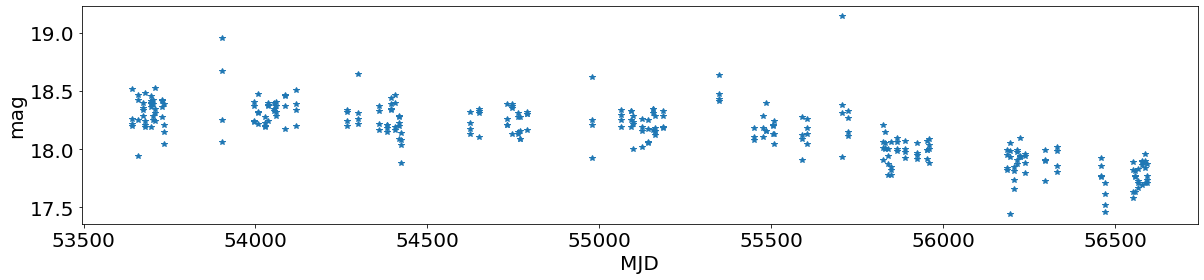

In [6]:
fig = plt.figure(figsize=(20,4))
plt.plot(MANTRAexample_mjd, MANTRAexample_mag, '*')
plt.xlabel('MJD', fontsize=20)
plt.ylabel('mag', fontsize=20)
plt.show()

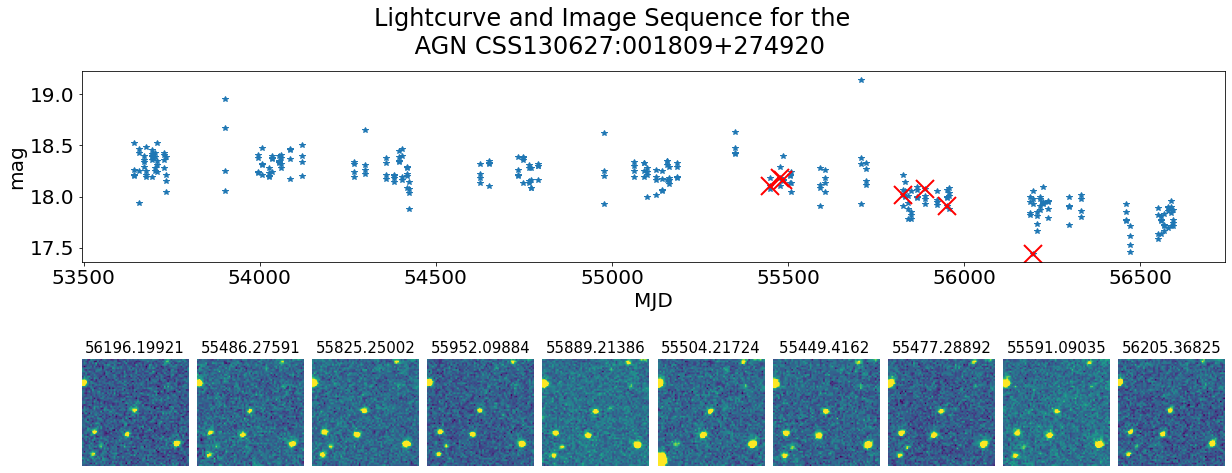

In [7]:
fig = plt.figure(figsize=(17,7), constrained_layout=True)
gs = fig.add_gridspec(4, 10)
f_ax1 = fig.add_subplot(gs[0:2, 0:])
plt.plot(MANTRAexample_mjd, MANTRAexample_mag, '*')
plt.xlabel('MJD', fontsize=20)
plt.ylabel('mag', fontsize=20)

data, h = fitsio.read(TAO_example_path, header=True)
N_Images = h['N_Images']
exts = np.arange(2,N_Images+2)
MJDs = np.array(data['MJD'])
np.random.shuffle(exts)

mjd_example = []
mag_example = []

for mjds in MJDs[np.sort(exts[:10]-2)]:
    cond = round(float(mjds),4) == np.around(MANTRAexample_mjd,4)
    if sum(cond) > 0:
        mjd_example.append( MANTRAexample_mjd[ round(float(mjds),4) == np.around(MANTRAexample_mjd,4) ] )
        mag_example.append( MANTRAexample_mag[ round(float(mjds),4) == np.around(MANTRAexample_mjd,4) ] )
plt.plot(mjd_example, mag_example, 'x', color='red', markersize=18, mew=2)

for i, ext in enumerate(exts[:10]):
    f_ax1 = fig.add_subplot(gs[2:4,i:i+1])
    data = fitsio.read(TAO_example_path, ext=ext)
    zmin, zmax = utils.zscale(data)
    plt.title('{}'.format(MJDs[ext-2]), fontsize=15)    
    plt.imshow(data, vmin=zmin, vmax=zmax)
    plt.axis('off')
plt.suptitle('Lightcurve and Image Sequence for the \n AGN CSS130627:001809+274920')
plt.savefig(TAO_PATH+'/figs/TAO_MANTRA.pdf', bbox_inches='tight')